In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
import sklearn.metrics as metrics
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
data=pd.read_csv("AAPL.csv")
data.set_index('Date', inplace=True)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-01,37.275002,37.555000,37.102501,37.512501,35.609295,141474400
2017-08-02,39.820000,39.937500,39.040001,39.285000,37.291874,279747200
2017-08-03,39.262501,39.302502,38.755001,38.892502,36.919292,108389200
2017-08-04,39.017502,39.349998,38.922501,39.097500,37.113876,82239600
2017-08-07,39.264999,39.730000,39.167500,39.702499,37.688194,87481200


In [4]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1113 entries, 2017-08-01 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1113 non-null   float64
 1   High       1113 non-null   float64
 2   Low        1113 non-null   float64
 3   Close      1113 non-null   float64
 4   Adj Close  1113 non-null   float64
 5   Volume     1113 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 60.9+ KB


In [6]:
df1=data.reset_index()['High']

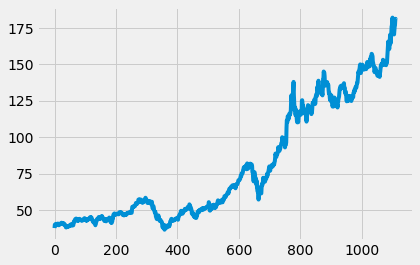

In [7]:
plt.plot(df1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [11]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [12]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [14]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)
import tensorflow as tf

Epoch 1/100
10/10 [==============================] - 8s 278ms/step - loss: 0.0065 - val_loss: 0.1046
Epoch 2/100
10/10 [==============================] - 2s 151ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 3/100
10/10 [==============================] - 2s 151ms/step - loss: 7.6774e-04 - val_loss: 0.0156
Epoch 4/100
10/10 [==============================] - 1s 146ms/step - loss: 6.4104e-04 - val_loss: 0.0018
Epoch 5/100
10/10 [==============================] - 1s 145ms/step - loss: 5.1872e-04 - val_loss: 0.0017
Epoch 6/100
10/10 [==============================] - 2s 148ms/step - loss: 4.6082e-04 - val_loss: 0.0024
Epoch 7/100
10/10 [==============================] - 1s 139ms/step - loss: 4.4143e-04 - val_loss: 0.0015
Epoch 8/100
10/10 [==============================] - 1s 148ms/step - loss: 3.9175e-04 - val_loss: 0.0016
Epoch 9/100
10/10 [==============================] - 1s 149ms/step - loss: 3.6919e-04 - val_loss: 0.0013
Epoch 10/100
10/10 [==============================] - 1s 149ms/

In [17]:
import tensorflow as tf

In [18]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [19]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [20]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

56.446956297201524

In [21]:
math.sqrt(mean_squared_error(ytest,test_predict))

132.97587954608647

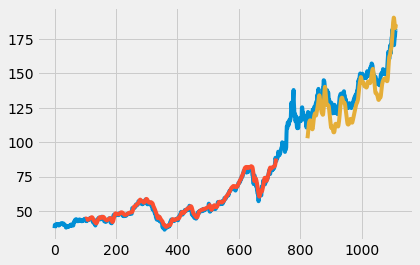

In [22]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [23]:
len(test_data)

390

In [24]:
x_input=test_data[290:].reshape(1,-1)
x_input.shape

(1, 100)

In [25]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [26]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.0502596]
101
1 day input [0.75696635 0.77295813 0.77563485 0.78764583 0.79100885 0.78442002
 0.76575152 0.76918323 0.78078242 0.7853809  0.7816747  0.77343851
 0.77089908 0.80343172 0.79869594 0.81365815 0.81187369 0.81125601
 0.82930673 0.82779677 0.82141384 0.81708986 0.78922439 0.78682226
 0.77563485 0.77240904 0.77137957 0.74406309 0.74241594 0.7549759
 0.75943719 0.76211391 0.75175019 0.74344541 0.74138636 0.74090598
 0.73088534 0.72601238 0.72621827 0.72560048 0.73980781 0.73953321
 0.7438572  0.73315028 0.72045292 0.73747427 0.74447488 0.75778993
 0.7737817  0.7777625  0.77700752 0.78071372 0.77515437 0.7852436
 0.7776252  0.80123537 0.77906656 0.77741931 0.79025397 0.79299929
 0.79615641 0.79457785 0.79025397 0.78929299 0.78037063 0.77556616
 0.78222368 0.79238161 0.78970488 0.81379544 0.83898417 0.85511324
 0.88723399 0.8604667  0.86280024 0.85120105 0.85628001 0.88599862
 0.91880575 0.87693886 0.88215513 0.9021963  0.92759092 0.95765273
 0.96307478 0.98284146 1.         0.

9 day output [[1.4831631]]
10 day input [0.7853809  0.7816747  0.77343851 0.77089908 0.80343172 0.79869594
 0.81365815 0.81187369 0.81125601 0.82930673 0.82779677 0.82141384
 0.81708986 0.78922439 0.78682226 0.77563485 0.77240904 0.77137957
 0.74406309 0.74241594 0.7549759  0.75943719 0.76211391 0.75175019
 0.74344541 0.74138636 0.74090598 0.73088534 0.72601238 0.72621827
 0.72560048 0.73980781 0.73953321 0.7438572  0.73315028 0.72045292
 0.73747427 0.74447488 0.75778993 0.7737817  0.7777625  0.77700752
 0.78071372 0.77515437 0.7852436  0.7776252  0.80123537 0.77906656
 0.77741931 0.79025397 0.79299929 0.79615641 0.79457785 0.79025397
 0.78929299 0.78037063 0.77556616 0.78222368 0.79238161 0.78970488
 0.81379544 0.83898417 0.85511324 0.88723399 0.8604667  0.86280024
 0.85120105 0.85628001 0.88599862 0.91880575 0.87693886 0.88215513
 0.9021963  0.92759092 0.95765273 0.96307478 0.98284146 1.
 0.9698696  0.98194918 0.99320518 0.94056277 0.9207275  0.93870962
 0.95696634 0.96376116 0.98826

19 day output [[2.4432566]]
20 day input [0.82779677 0.82141384 0.81708986 0.78922439 0.78682226 0.77563485
 0.77240904 0.77137957 0.74406309 0.74241594 0.7549759  0.75943719
 0.76211391 0.75175019 0.74344541 0.74138636 0.74090598 0.73088534
 0.72601238 0.72621827 0.72560048 0.73980781 0.73953321 0.7438572
 0.73315028 0.72045292 0.73747427 0.74447488 0.75778993 0.7737817
 0.7777625  0.77700752 0.78071372 0.77515437 0.7852436  0.7776252
 0.80123537 0.77906656 0.77741931 0.79025397 0.79299929 0.79615641
 0.79457785 0.79025397 0.78929299 0.78037063 0.77556616 0.78222368
 0.79238161 0.78970488 0.81379544 0.83898417 0.85511324 0.88723399
 0.8604667  0.86280024 0.85120105 0.85628001 0.88599862 0.91880575
 0.87693886 0.88215513 0.9021963  0.92759092 0.95765273 0.96307478
 0.98284146 1.         0.9698696  0.98194918 0.99320518 0.94056277
 0.9207275  0.93870962 0.95696634 0.96376116 0.98826351 0.99450925
 0.98970487 0.98929308 1.05025959 1.07103086 1.09982765 1.13533676
 1.1769526  1.22467768 1

28 day output [[2.9210742]]
29 day input [0.74241594 0.7549759  0.75943719 0.76211391 0.75175019 0.74344541
 0.74138636 0.74090598 0.73088534 0.72601238 0.72621827 0.72560048
 0.73980781 0.73953321 0.7438572  0.73315028 0.72045292 0.73747427
 0.74447488 0.75778993 0.7737817  0.7777625  0.77700752 0.78071372
 0.77515437 0.7852436  0.7776252  0.80123537 0.77906656 0.77741931
 0.79025397 0.79299929 0.79615641 0.79457785 0.79025397 0.78929299
 0.78037063 0.77556616 0.78222368 0.79238161 0.78970488 0.81379544
 0.83898417 0.85511324 0.88723399 0.8604667  0.86280024 0.85120105
 0.85628001 0.88599862 0.91880575 0.87693886 0.88215513 0.9021963
 0.92759092 0.95765273 0.96307478 0.98284146 1.         0.9698696
 0.98194918 0.99320518 0.94056277 0.9207275  0.93870962 0.95696634
 0.96376116 0.98826351 0.99450925 0.98970487 0.98929308 1.05025959
 1.07103086 1.09982765 1.13533676 1.1769526  1.22467768 1.27882087
 1.33976877 1.40783584 1.48316312 1.56563556 1.65480959 1.7498579
 1.84954524 1.95225692 2

In [27]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [28]:
scaler.inverse_transform(lst_output)


array([[189.45282754],
       [192.47920095],
       [196.6748937 ],
       [201.84857113],
       [207.91199977],
       [214.86554438],
       [222.75420749],
       [231.6343161 ],
       [241.5516891 ],
       [252.52687376],
       [264.5431092 ],
       [277.53576614],
       [291.38430515],
       [305.90875077],
       [320.87384271],
       [336.00185393],
       [350.99442329],
       [365.55881715],
       [379.43429515],
       [392.41250125],
       [404.34906604],
       [415.16437095],
       [424.83687869],
       [433.3923298 ],
       [440.88963924],
       [447.40922453],
       [453.0428971 ],
       [457.88552532],
       [462.03051855],
       [465.56569342]])

In [29]:
len(df1)

1113

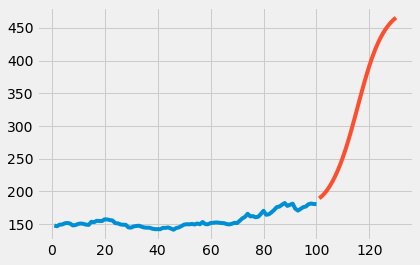

In [30]:
plt.plot(day_new,scaler.inverse_transform(df1[1013:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')

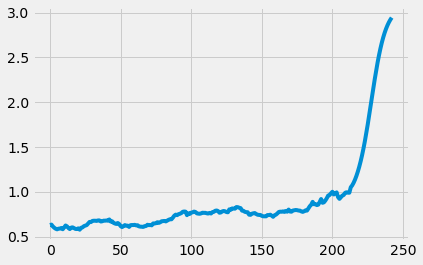

In [31]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[900:])

In [32]:
df3=scaler.inverse_transform(df3).tolist()

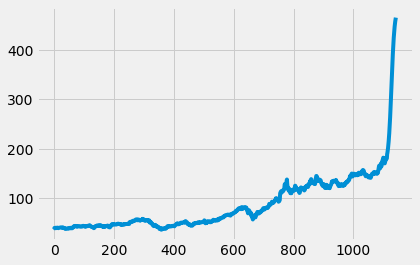

In [33]:
plt.plot(df3)